<a href="https://colab.research.google.com/github/RavivarmanDevarajan/Hydraulic-System-Analysis-and-Pump-Modelling-/blob/main/Data_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Data Sets and loading the packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

from google.colab import drive
drive.mount ('/content/drive')
folder_path = ('/content/drive/MyDrive/data/Pump Model')
file_list = os.listdir(folder_path)
dfs = []
for file_name in file_list:
  file_path = os.path.join(folder_path, file_name)

  if file_name.endswith('.lvm'):
    dataframe = pd.read_csv(file_path, delimiter='\t', skiprows=21)
    dfs.append(dataframe)
df = pd.concat(dfs, ignore_index = True)
df = df.rename(columns={'P1 (bar)' : 'P1', 'P2 (bar)' : 'P2', 'P3 (bar)' : 'P3', 'P4 (bar)' : 'P4','P5 (bar)' : 'P5'})
df.head()

Mounted at /content/drive


,X_Value,P1,P2,P3,P4,P5,F1 (bar),F2 (bar),RPM,DP_Pump (bar),...,DPV1_CMD,DPV2_CMD,DPV3_CMD,DPV4_CMD,DPV5_CMD,Re_nodel,F1_model,V (m/s),V_model (m/s),Comment
0,0.0,0.885,0.783,2.005,1.607,1.408,1.2276,0.0056,700.0,1.181,...,20000.0,4000.0,20000.0,20000.0,4000.0,12561.844758,2.165967,1.632930,2.872703,NaN
1,0.0,0.887,0.787,1.999,1.590,1.390,1.2316,0.0080,700.0,1.222,...,20000.0,4000.0,20000.0,20000.0,4000.0,12510.697086,2.157148,1.628155,2.861006,NaN
2,0.0,0.888,0.783,1.954,1.594,1.395,1.2300,0.0072,700.0,1.212,...,20000.0,4000.0,20000.0,20000.0,4000.0,12523.172128,2.159299,1.633460,2.863859,NaN
3,0.0,0.886,0.778,1.923,1.606,1.414,1.2296,0.0096,700.0,1.171,...,20000.0,4000.0,20000.0,20000.0,4000.0,12574.319800,2.168118,1.631338,2.875556,NaN
4,0.0,0.886,0.776,1.925,1.612,1.420,1.2272,0.0072,700.0,1.145,...,20000.0,4000.0,20000.0,20000.0,4000.0,12606.754909,2.173710,1.630808,2.882973,NaN


#Data Reduction and Data Transformation

In [6]:
columns = ['P2','P3','RPM','F1 (bar)'] #Selecting the required columns
selected_df = df[columns]
selected_df['P3 -P2'] = selected_df['P3'] - selected_df['P2'] #calculating differential pressure across the pump (P3 -P2)
selected_df.head()
print(selected_df)

         P2     P3    RPM  F1 (bar)  P3 -P2
0     0.783  2.005  700.0    1.2276   1.222
1     0.787  1.999  700.0    1.2316   1.212
2     0.783  1.954  700.0    1.2300   1.171
3     0.778  1.923  700.0    1.2296   1.145
4     0.776  1.925  700.0    1.2272   1.149
...     ...    ...    ...       ...     ...
4921  0.777  3.944  900.0    1.2404   3.167
4922  0.778  4.026  900.0    1.2408   3.248
4923  0.777  3.918  900.0    1.2408   3.141
4924  0.778  4.021  900.0    1.2420   3.243
4925  0.777  3.936  900.0    1.2412   3.159

[4926 rows x 5 columns]


<ipython-input-6-8552ab6d8dc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['P3 -P2'] = selected_df['P3'] - selected_df['P2'] #calculating differential pressure across the pump (P3 -P2)


#Creating a Neural Network Regression Model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 2)                 10        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 45 (180.00 Byte)
Trainable params: 45 (180.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
99/99 [==============================] - 1s 4ms/step - loss: 1.2103 - mae: 1.0748 - val_loss: 0.7572 - val_mae: 0.8316
Epoch 2/50
99/99 [==

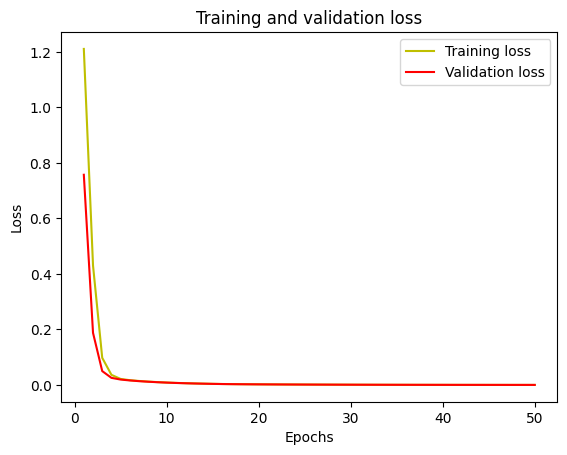

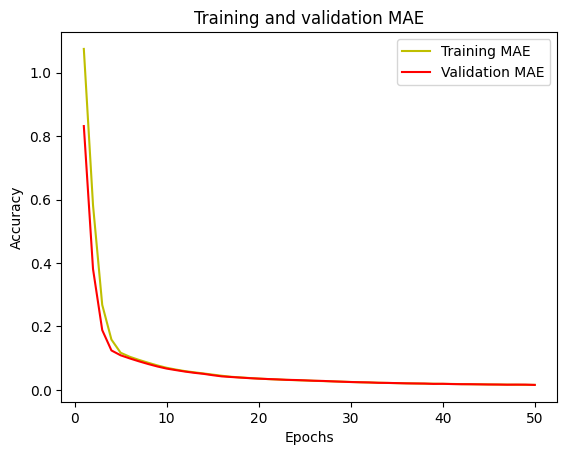

In [10]:

X = selected_df[['P3 -P2', 'RPM']] #defining the input paramenters
y = selected_df['F1 (bar)'] #defining the output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 20) # Splitting the dataset into training and testing sets
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Building the neural network model
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(4, activation='relu')) #First hidden layer with 4 neurons
model.add(Dense(2, activation='relu')) #Second hidden layer with 2 neurons
model.add(Dense(1))  # Output layer with single neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

#Plotting the Loss and MAE
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Comparing the Model Performance using the provided model verification data

1/1 [==============================] - 0s 100ms/step


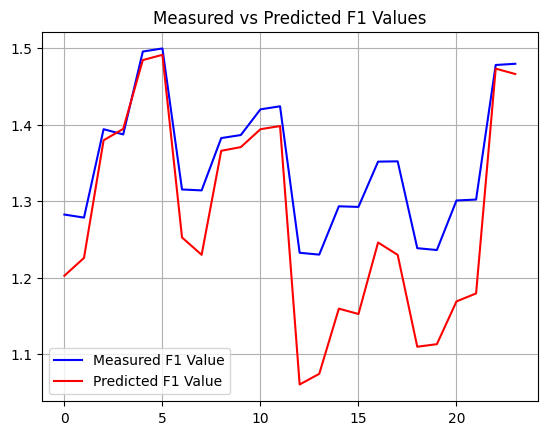

In [11]:
new_data = pd.read_csv('/content/drive/MyDrive/data/Pump Model/newdata.csv.csv') #importing the verification data
X_new = new_data[['P3 -P2', 'RPM']] #setting the input parameters
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)
predicted_f1 = model.predict(X_new_scaled) #predicting the output
new_data['Predicted_F1(bar)'] = predicted_f1 #creating a new column for the predicted flow rate

#plotting the variations between measured and predicted values
y = new_data['Measured F1 Value']
z = new_data['Predicted_F1(bar)']
plt.plot( y, label='Measured F1 Value', color='blue')
plt.plot( z, label='Predicted F1 Value', color='red')
plt.title('Measured vs Predicted F1 Values')
plt.legend()
plt.grid(True)
plt.show()
